## Graph/network theory
- In this notebook we will show you some of the common commands you can use when you study and make network graphs using Python.¶We will use a simple example with a bunch of kids who have been interacting with eachother during a school day. Some of them got sick with a virus infection later same day. We will study the network to see if it can tell us something about the transmission of the virus among the kids. The notebook contain in total four exercises.
- It is related to the presentation..... 

## Installation of libraries and necessary software¶
- Code to install libraries
- State that this has to be run only once
- If necessary, further installation instructions

In [2]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
#from custom import load_data as cf
import csv
#from operator import itemgetter
#import community 
import pandas as pd
#from custom import ecdf
from statsmodels.distributions.empirical_distribution import ECDF

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading data¶

- Load the two csv files: 
        Kids_nodes.csv (contains names and information about whether the kid got sick or not) 
        Kids_edges.cvs (contains information about who played with whom)
        (If you would like to see the content of the two files use pd.read_csv("kids_nodes.csv") and pd.read_csv("kids_edges.csv"))

In [4]:
# Open the file with nodes
with open('./data/kids_nodes.csv', 'r') as nodecsv:                 
    nodereader = csv.reader(nodecsv) 
    nodes = [n for n in nodereader][1:]                     

# Get a list of only the node names                                       
node_names = [n[0] for n in nodes]    

# Open the file with edges
with open('./data/kids_edges.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv) 
    edges = [tuple(e) for e in edgereader][1:] 
    
G = nx.Graph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

###  Nodes and edges
Let us first look at the nodes and edges in the network that we are going to create. 

We can start by examining out how many nodes the network contains. We do so by finding the length of the list containing the nodes of the networks.
At the same time we would also like to see the names of the nodes. The list may though be very long so we can limit the number of nodes we would like to see by using [0:5] which will only return the first five nodes.

In [6]:
# The number of nodes in the network
print(len(G.nodes()))

# The first five nodes in the network
print(list(G.nodes())[0:5])

11
['mads', 'emil', 'anna', 'mette', 'lise']


#### Exercise 1.1. Now, it turned out that this list was not very long. Edit the code to get the name of the rest of the nodes (excl. the names of the first five nodes)

In [8]:
# %load solutions/ex1_1.py
# The name of the rest of the nodes.
print(list(G.nodes())[5:11])

['lotte', 'jens', 'jesper', 'julie', 'lars', 'line']


Now let us look at the same for the edges. Firstly, the links in this network is represented in the form of edge list (a list of each connected pair). 

The number of edges in the network is also represented by the lenght of the list of edges. So we can simply reuse the command for the length of the list of nodes and exchange the word nodes with the word edges. The same can be done for the list-commands.

In [11]:
G.edges()

EdgeView([('mads', 'emil'), ('mads', 'lise'), ('mads', 'mette'), ('mads', 'jesper'), ('mads', 'lotte'), ('mads', 'jens'), ('mads', 'julie'), ('emil', 'mette'), ('emil', 'lise'), ('emil', 'jens'), ('emil', 'jesper'), ('anna', 'mette'), ('anna', 'lise'), ('anna', 'lotte'), ('mette', 'jens'), ('lise', 'lotte'), ('lotte', 'lars'), ('lotte', 'jesper'), ('julie', 'line'), ('lars', 'line')])

#### Exercise 2. How many edges are there in G?

In [14]:
# %load solutions/ex1_2.py

print(G.number_of_edges())
print(len(G.edges()))
# both are equally valid solutions

20
20


The `print` statement also let's us report the data in a more readable fassion, for instance:

In [17]:
print("number of nodes: ",  G.number_of_nodes())
print("number of edges: ", G.number_of_edges())

number of nodes:  11
number of edges:  20


#### Exercise 3a. Are there any students named Lea in G?
Tip: write `G.` and press Tab to pop up a window of available attributes and methods. Maybe what you are looking for is in there? 

In [27]:
#%load solutions/ex1_3a.py

print(G.has_node('lea'))

# a more general method:
print('lea' in G.nodes())

False
False


#### Exercise 3b. Did Mette and Anna have any contact at the day of the study?

In [32]:
# %load solutions/ex1_3b.py
# same approach as above
print(G.has_edge('mette','anna'))

True


###  Drawing the network
Now we know a bit about the size and nature of the network. Let's try to draw the network - without and with names on the nodes.

We do so by using the command nx.draw from the networkx package

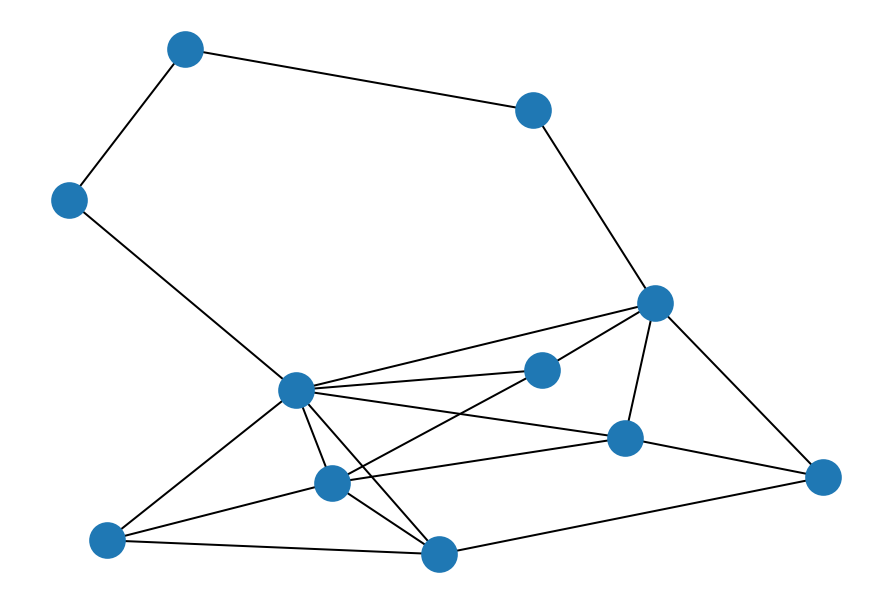

In [35]:
# Draw network
nx.draw(G)

The graph/network is drawn without labels on the nodes by default. You can change that by using the command se the command nx.draw(G, with_labels=True)

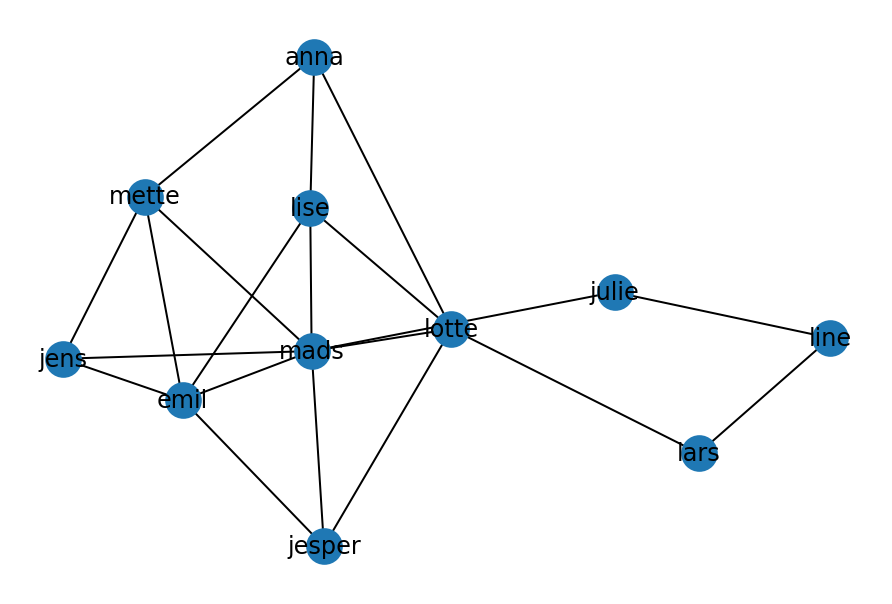

In [48]:
# Draw network with labels
nx.draw(G, with_labels=True)

The two networks displayed probably look different because there is some randomness in the projection algorithm. However, keep in mind that the edges are the exact same, so they are **topologically** identical - an important concept.

Below you can see a code that can help you substract a sub-graph showing only the play mates of a specific kid. In the example below you will see who Anna has been playing with that day (you do not need to understand the entire code).

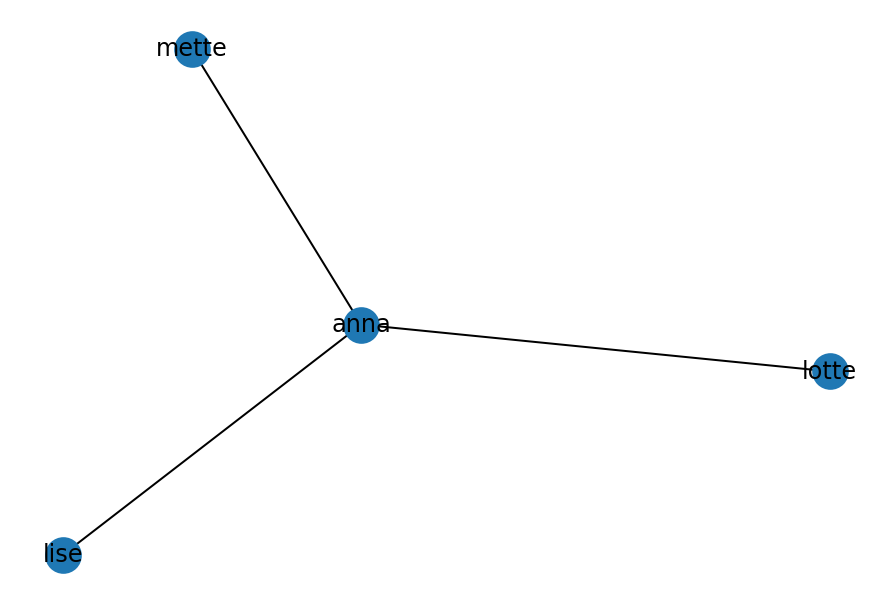

In [42]:
def extract_subgraph(G, node):
    new_G = nx.Graph()    
    for neighbor in G.neighbors(node):
        new_G.add_edge(node, neighbor)
    return new_G

fig = plt.figure()
newG = extract_subgraph(G, 'anna')
nx.draw(newG, with_labels=True)

#### Exercise 4a. Use the above function to display all the friends of Mads.

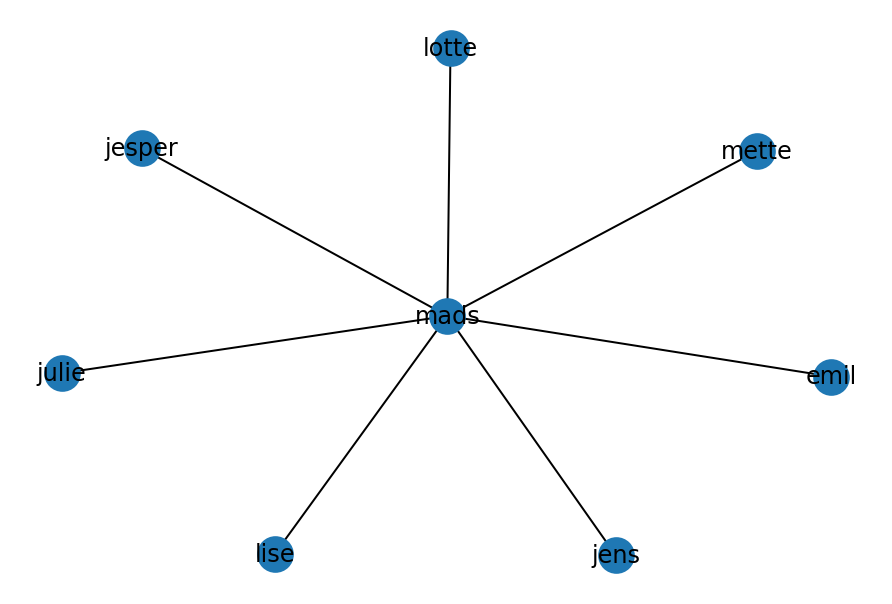

In [46]:
#%load solutions/ex1_4a.py
G_mads = extract_subgraph(G, 'mads')
nx.draw(G_mads, with_labels=True)

#### Exercise 4b. How many kids did Mads play with that day?

In [47]:
# %load solutions/ex1_4b.py

print(G_mads.number_of_edges())

7


### Extracting information about neighbors (centrality), degree of centrality and ranking based on centrality. 
We just saw how we could get subgraphs containing the playmates of a specific kid - in graph theory these will be the neighbors of a specific node. We can also make commands that will give us the information as numbers and lists. 

If we would like to know the neighbors (here playmates) of e.g. the first node (here Mads), we can use the G.neighbors(node) function.

In [49]:
# Neighbors of the node with the name "mads"
list(G.neighbors('mads'))

['emil', 'lise', 'mette', 'jesper', 'lotte', 'jens', 'julie']

The number of neighbors - i.e. the number of other nodes, that one node is connected to - is a measure of the nodes centrality. We could count them like we did above - or we could use the len function to find out the length of the list above. Let's use the `len` function.

In [51]:
# The number of neighbors of the node "mads"? (i.e. what is the centrality of "mads")
len(list(G.neighbors('mads')))

7

Now pick any kid and calculate its centrality and see who the kid played with


In [52]:
# List of neighbors
list(G.neighbors('jesper'))

['mads', 'emil', 'lotte']

In [93]:
# Calculation of centrality
len(list(G.neighbors('jesper')))

3

We can now rank the nodes based on how many nodes they have (the *degree*):

In [94]:
degs = G.degree
print(degs)

[('mads', 7), ('emil', 5), ('anna', 3), ('mette', 4), ('lise', 4), ('lotte', 5), ('jens', 3), ('jesper', 3), ('julie', 2), ('lars', 2), ('line', 2)]


#### Exercise 5a. Present nodes sorted by the number of degrees. We recommend using the built-in `sorted` function for this.
Problem: it sorts by default by the first element in the items (i.e. names alphabetically). Can you change that?

In [130]:
# this will not work:
sorted(degs)

[('anna', 3),
 ('emil', 5),
 ('jens', 3),
 ('jesper', 3),
 ('julie', 2),
 ('lars', 2),
 ('line', 2),
 ('lise', 4),
 ('lotte', 5),
 ('mads', 7),
 ('mette', 4)]

To help you get started, inspect the documentation: 

In [131]:
sorted??

In [134]:
# %load solutions/ex1_5a.py

degs_srt = sorted(degs, key = lambda item : item[1], reverse=True)
print(degs_srt)

# explanation: it selects the second element, i.e. the degree, for each of the items
# If you are new to lambda functions, it is only syntactical convenience.
# we could have achieved the same using a regular function:

def func(item): return item[1]
sorted(degs, key = func, reverse=True)


[('mads', 7), ('emil', 5), ('lotte', 5), ('mette', 4), ('lise', 4), ('anna', 3), ('jens', 3), ('jesper', 3), ('julie', 2), ('lars', 2), ('line', 2)]


[('mads', 7),
 ('emil', 5),
 ('lotte', 5),
 ('mette', 4),
 ('lise', 4),
 ('anna', 3),
 ('jens', 3),
 ('jesper', 3),
 ('julie', 2),
 ('lars', 2),
 ('line', 2)]

It is by default sorted from highest to lowest.

#### Exercise 5b. Who has the second highest number of friends?

Hint: The degrees are stored in a custom made data structure by networkx:

In [135]:
# %load solutions/ex1_5b.py

# assuming you have named your sorted list degs_srt
degs_srt[1]

('emil', 5)

An equivalent function yields the degree normalized from 0-1

In [143]:
degs = nx.algorithms.centrality.degree_centrality(G) #notice some floating point errors...

In [147]:
type(degs)

dict

This returns a `dict`, from which we can extract only the numerical values:

In [154]:
vals = list(degs.values())
vals

[0.7000000000000001,
 0.5,
 0.30000000000000004,
 0.4,
 0.4,
 0.5,
 0.30000000000000004,
 0.30000000000000004,
 0.2,
 0.2,
 0.2]

And now we can plot them. Here are a few different ways to represent them.

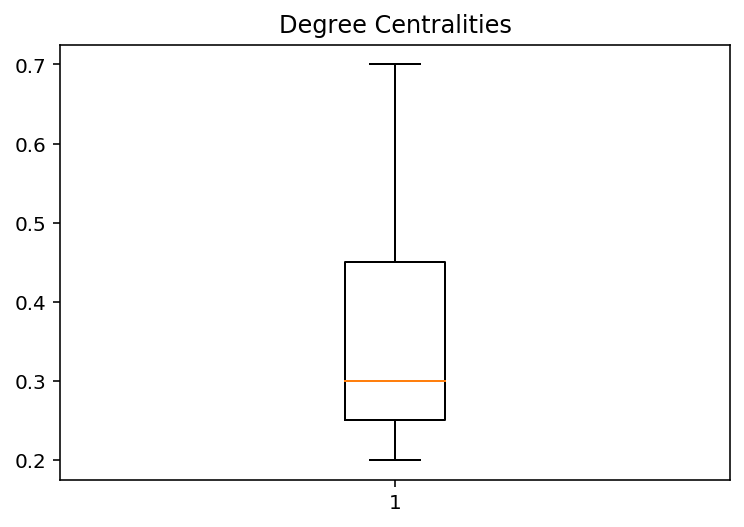

In [171]:
plt.boxplot(vals)
plt.title('Degree Centralities')
plt.show()

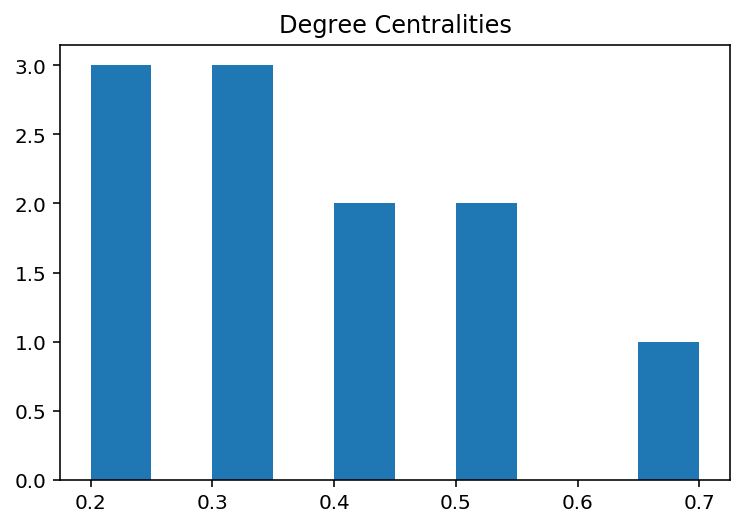

In [169]:
plt.hist(vals)
plt.title('Degree Centralities')
plt.show()

In [160]:
ecdf = ECDF(vals)
x,y = ecdf.x, ecdf.y

Text(0.5, 1.0, 'Degree Centralities')

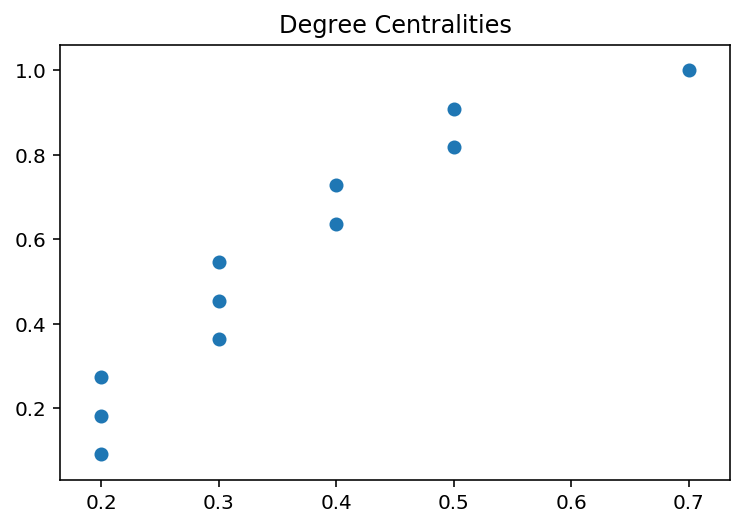

In [172]:
plt.scatter(x,y)
plt.title('Degree Centralities')

#### Exercise 7. How many of the kids only had a single playmate at the day of the study?

In [196]:
# %load solutions/ex1_7.py

#many ways to do this, this is only one example
d = dict(G.degree)
1 in d.values()

# answer: none

False

### Sick or not sick?
Now, in the csv file we also have information about whether or not the kids got sick or not. Let us use this information and see if it can tell us something about the contamination.

In [199]:
df = pd.read_csv('data/kids_nodes.csv')
df.head()

,source,sick
0,mads,True
1,emil,False
2,anna,False
3,mette,False
4,lise,False


#### Exercise 8. Display only those who were sick

In [228]:
# %load solutions/ex1_8.py

# pandas supports boolean indexing
sick = df.loc[df.sick == True]
sick

,source,sick
0,mads,True
5,lotte,True
6,jens,True
7,jesper,True


Let us highlight the sick kids and redraw the network. Do you see any pattern?

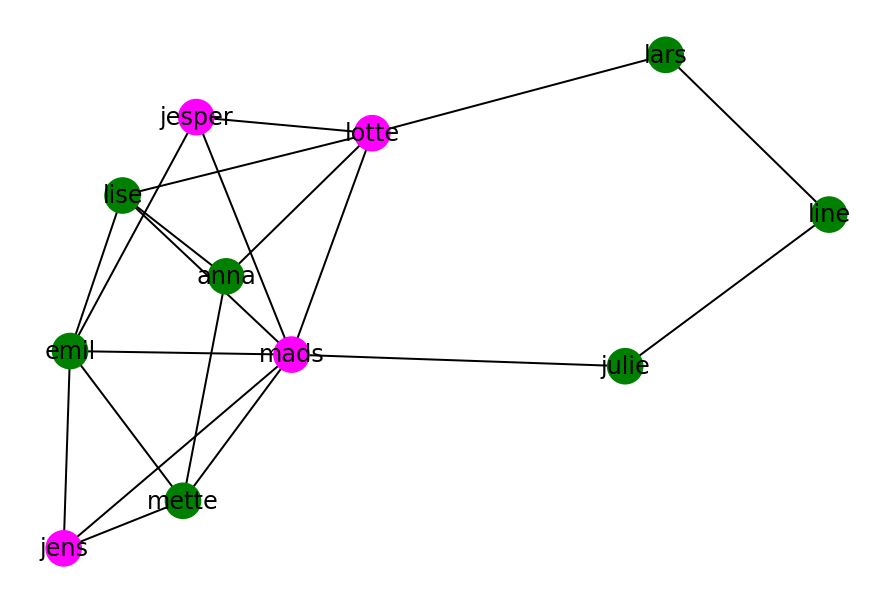

In [247]:
#don't worry about the code
color_map = []
for node in G:
    if node in sick.source.values:
        color_map.append('magenta')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

By visual inspection we see that Mads is the common denominator for the sick kids, pointing to him as a source of contamination. Below we plot only the subgraph consisting of the sick kids.

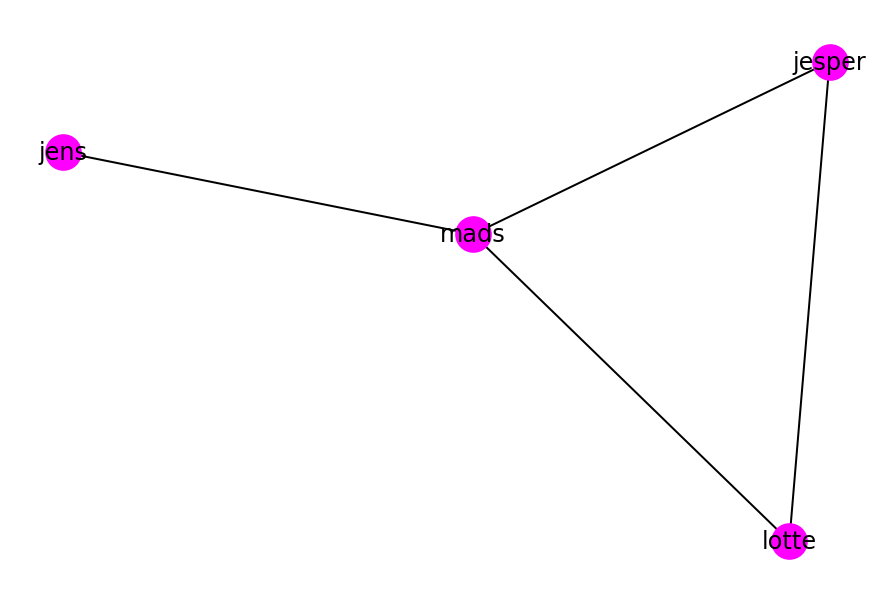

In [251]:
sub_G = G.subgraph(sick.source)
nx.draw(sub_G, with_labels=True, node_color='magenta')

We should also warn the children who were in contact with the contaminated kids. We use the `set` data structure: an unordered list without duplicates.

In [252]:
kids_to_warn = set()

In [254]:
for sick_kid in sick.source:
    print(sick_kid)
    nbs = list(G.neighbors(sick_kid)) #list of kids the contaminated ones were in contact with
    for nb in nbs:
        kids_to_warn.add(nb)


mads
lotte
jens
jesper


#### Exercise 9.  Finally drop those we already know were sick from the set.
Tip: write `kids_to_warn.` and press Tab to see available methods

In [255]:
# %load solutions/ex1_9.py
for kid in sick.source:
    kids_to_warn.discard(kid)

In [258]:
print("The kids to warn:")
print(kids_to_warn)

The kids to warn:
{'julie', 'mette', 'anna', 'lise', 'lars', 'emil'}


### Adding nodes and edges
Ups - during the data collection some of the kids forgot that they also played with Hans that day! Here we will show you how to add Hans to the network. You may try to add even more kids to the network.

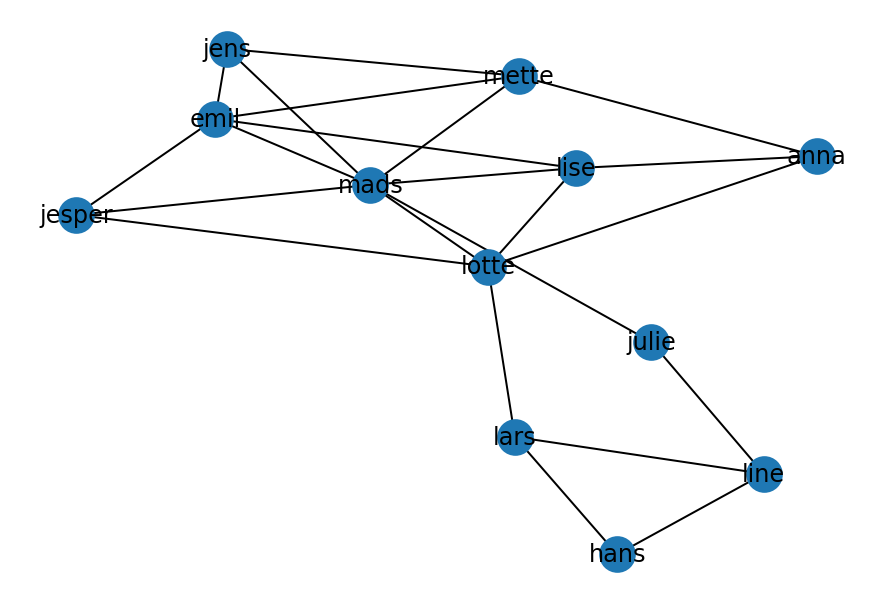

In [259]:
G.add_node('hans')

# Add multiple edges
G.add_edges_from([
    ('hans', 'lars'),
    ('hans', 'line'),
])

nx.draw(G, with_labels=True)